# Introductory applied machine learning
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [133]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
import re
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pylab
pylab.rcParams['figure.figsize'] = (16, 9)

# Your Code goes here:

# Getting far too many warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [3]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:

imagesC = pd.read_csv('datasets/Images_C_Train.csv')
regex = re.compile('dim\d*')
keep = [col for col in imagesC.columns if regex.search(col)] + ['is_person']
imTrain = imagesC[keep]
imTest  = pd.read_csv('datasets/Images_C_Test.csv')#[keep] There are only dim data for the test set
imVal   = pd.read_csv('datasets/Images_C_Validate.csv')[keep]

In [4]:
imTrain.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801,0.448178
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857,0.497425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076,1.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755,1.000000


In [5]:
imVal.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


In [6]:
imTest.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,...,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.001754,0.000717,0.004379,0.001839,0.002207,0.002105,0.001058,0.002535,0.002053,0.002746,...,0.002033,0.000577,0.004880,0.001537,0.003591,0.002080,0.002897,0.002216,0.002438,0.003017
std,0.001226,0.001522,0.003648,0.001320,0.001539,0.001612,0.000863,0.002867,0.001990,0.002470,...,0.001597,0.001146,0.006427,0.001200,0.002626,0.001519,0.003240,0.001449,0.001897,0.002795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000977,0.000000,0.001488,0.000744,0.001019,0.001019,0.000340,0.000679,0.000744,0.001065,...,0.000791,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001065,0.001019,0.001019
50%,0.001590,0.000340,0.003397,0.001698,0.001860,0.001776,0.000822,0.001596,0.001667,0.002115,...,0.001698,0.000000,0.002717,0.001359,0.003057,0.001813,0.002038,0.002038,0.002038,0.002361
75%,0.002378,0.000781,0.006454,0.002717,0.003057,0.002717,0.001698,0.003397,0.002717,0.003720,...,0.002717,0.000679,0.006793,0.002232,0.004755,0.002734,0.003831,0.003057,0.003463,0.004076
max,0.009046,0.027699,0.021399,0.007473,0.009766,0.011889,0.004755,0.021399,0.021140,0.022500,...,0.015253,0.010691,0.062500,0.007576,0.026834,0.009851,0.029212,0.007812,0.012228,0.028193


- We can see the training data has some outliers, so we will need to remove those first; applying anything we do to the training data to the other sets too.

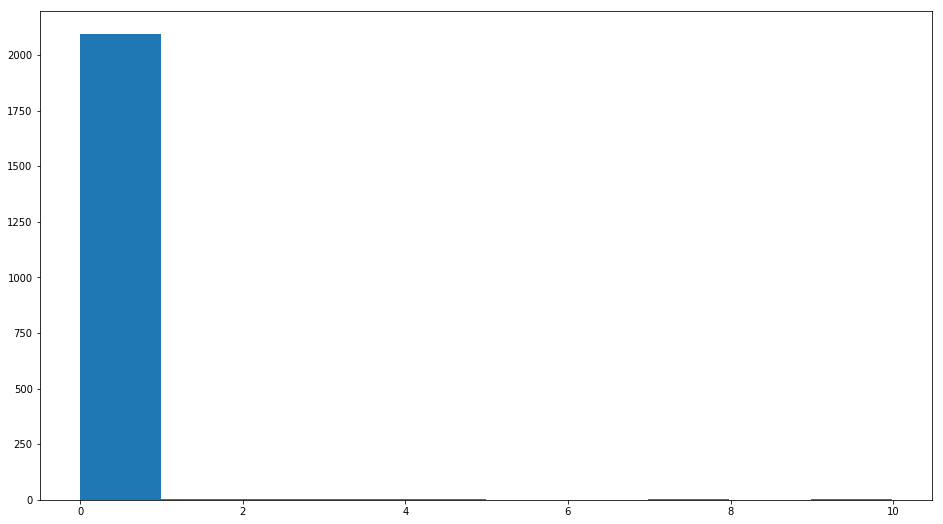

In [7]:
plt.hist(imTrain['dim1']);

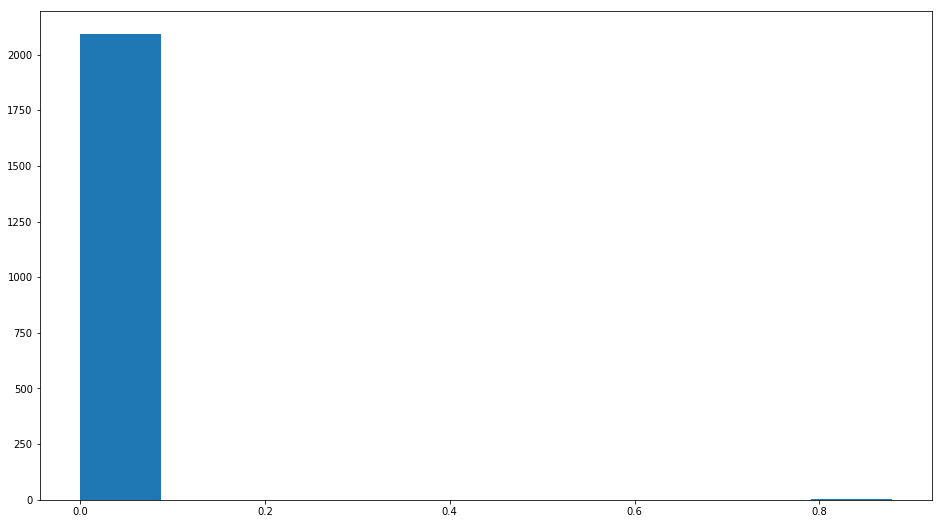

In [8]:
plt.hist(imTrain.query('dim1 < 1')['dim1']);

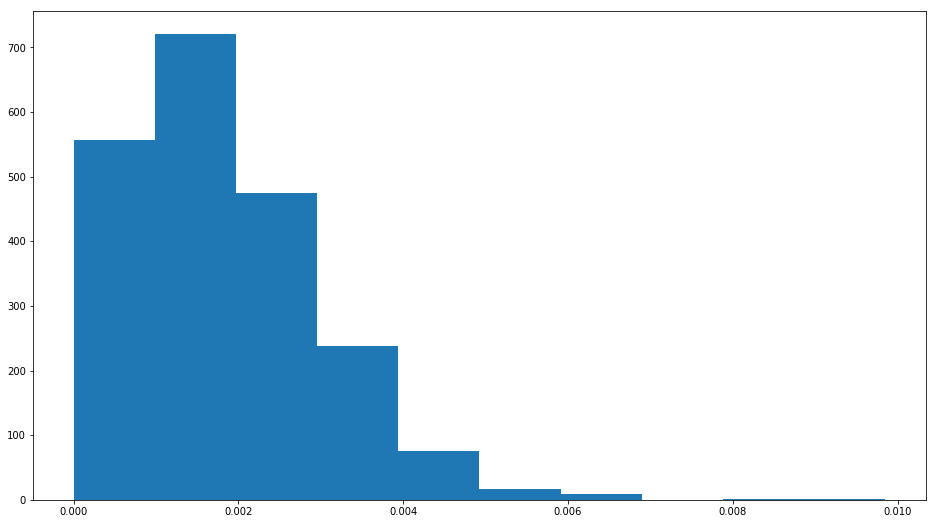

In [9]:
plt.hist(imTrain.query('dim1 < 0.5')['dim1']);

- Cutting off values less than 0.5 we can see that actually values don't exceed 0.01 apart from the few we can see (faintly) in the earlier plots so this should be a fair cutoff.

In [10]:
imTrain = imTrain.query('dim1 < 0.1')
imTrain.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


- The data now looks more reasonable, let's do this to the rest of the data so there is no bias.

In [11]:
imTest = imTest.query('dim1 < 0.1')
imVal  = imVal.query('dim1 < 0.1')

X_train = imTrain.drop('is_person', axis=1)
y_train = imTrain['is_person']
X_test  = imTest.drop('is_person', axis=1)
y_test  = imTest['is_person']
X_val   = imVal.drop('is_person', axis=1)
y_val   = imVal['is_person']

- Scaling the data should help matters, and we can do this in many ways. I will try StandardScaler and MinMaxScaler.
- PCA might also help, especially with some classifiers
- There are many classifiers we can try. I will attempt Gaussian Naive Bayes, Random Forrest, Logistics Regression and Support Vector Machines
- Within each of these there are some parameters that I will try to optimise

In [12]:
standScaler    = StandardScaler().fit(X_train)
sscaledX_train = standScaler.transform(X_train)
sscaledX_val   = standScaler.transform(X_val)
sscaledX_test  = standScaler.transform(X_test)

minmaxScaler    = MinMaxScaler().fit(X_train)
mmscaledX_train = minmaxScaler.transform(X_train)
mmscaledX_val   = minmaxScaler.transform(X_val)
mmscaledX_test  = minmaxScaler.transform(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Gaussian Naive Bayes

In [13]:
ssGNB = GaussianNB()
ssGNB.fit(sscaledX_train, y_train)

ssGNB.score(sscaledX_val, y_val)

0.6442048517520216

In [14]:
mmGNB = GaussianNB()
mmGNB.fit(mmscaledX_train, y_train)
mmGNB.score(mmscaledX_val, y_val)

0.6442048517520216

In [15]:
n_vals = np.logspace(0, 2.699, 20)
for n in n_vals:
    PCAn = PCA(int(n), random_state=1000)
    GNBn = GaussianNB()
    X_new = PCAn.fit_transform(sscaledX_train)
    GNBn.fit(X_new, y_train)
    print("| n = {0:>5} | score = {1:.3f} |".format(int(n), GNBn.score(X_new, y_train)))

| n =     1 | score = 0.569 |
| n =     1 | score = 0.569 |
| n =     1 | score = 0.569 |
| n =     2 | score = 0.623 |
| n =     3 | score = 0.634 |
| n =     5 | score = 0.647 |
| n =     7 | score = 0.668 |
| n =     9 | score = 0.662 |
| n =    13 | score = 0.668 |
| n =    18 | score = 0.668 |
| n =    26 | score = 0.663 |
| n =    36 | score = 0.649 |
| n =    50 | score = 0.645 |
| n =    70 | score = 0.645 |
| n =    97 | score = 0.646 |
| n =   135 | score = 0.642 |
| n =   187 | score = 0.656 |
| n =   259 | score = 0.675 |
| n =   360 | score = 0.684 |
| n =   500 | score = 0.700 |


In [141]:
PCA500 = PCA(500, random_state=1000)
GNB500 = GaussianNB()
PCA500 = PCA500.fit(sscaledX_train)
X_train_new = PCA500.transform(sscaledX_train)
X_val_new = PCA500.transform(sscaledX_val)
GNB500.fit(X_train_new, y_train)
GNB500.score(X_val_new, y_val)

0.6639712488769093

In [143]:
gnbProbs = GNB500.predict_proba(X_val_new)
log_loss(y_val, gnbProbs)

1.4688492543211131

- Doing the PCA on Gaussian Naive Bayes with n=500 (the total number of features) improves accuracy which makes sense since the PCA tries to produce features that are perpendicular in the n-dimensional space and this is in line with the assumption of Naive Bayes that each feature is conditionally independent.
- It is interesting here to see the classification accuracy of the Naive approach is fairly good, but the log loss shows us that the predictions are not very stable

## Random Forrest

In [17]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(sscaledX_train, y_train)
print("Score on training:", rf.score(sscaledX_train, y_train))
print("Score on validation:", rf.score(sscaledX_val, y_val))

Score on training: 1.0
Score on validation: 0.706199460916442


- Perhaps the classifier is over-fitting to the training data?

In [18]:
depths = list(range(1, 20))
for d in depths:
    rfd = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=d)
    rfd.fit(sscaledX_train, y_train)
    print("| max depth: {0:>3} | train: {1:.3f} | val: {2:.3f} |".format(d, rfd.score(sscaledX_train, y_train), rfd.score(sscaledX_val, y_val)))

| max depth:   1 | train: 0.658 | val: 0.625 |
| max depth:   2 | train: 0.699 | val: 0.660 |
| max depth:   3 | train: 0.723 | val: 0.668 |
| max depth:   4 | train: 0.757 | val: 0.672 |
| max depth:   5 | train: 0.815 | val: 0.670 |
| max depth:   6 | train: 0.881 | val: 0.677 |
| max depth:   7 | train: 0.938 | val: 0.672 |
| max depth:   8 | train: 0.977 | val: 0.686 |
| max depth:   9 | train: 0.996 | val: 0.689 |
| max depth:  10 | train: 1.000 | val: 0.694 |
| max depth:  11 | train: 1.000 | val: 0.686 |
| max depth:  12 | train: 1.000 | val: 0.687 |
| max depth:  13 | train: 1.000 | val: 0.690 |
| max depth:  14 | train: 1.000 | val: 0.696 |
| max depth:  15 | train: 1.000 | val: 0.695 |
| max depth:  16 | train: 1.000 | val: 0.688 |
| max depth:  17 | train: 1.000 | val: 0.708 |
| max depth:  18 | train: 1.000 | val: 0.709 |
| max depth:  19 | train: 1.000 | val: 0.694 |


- Actually, we only see the best validation set scores when the accuracy on the training data is 100% so this is fine, but it was good to check

In [144]:
scores = []
n_vals = np.logspace(0, 2.699, 50)
n_vals = list(sorted(set([ int(n) for n in n_vals ])))
for n in n_vals:
    PCAn = PCA(int(n), random_state=1000).fit(sscaledX_train)
    rfn = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=18)
    X_new = PCAn.transform(sscaledX_train)
    X_val_new = PCAn.transform(sscaledX_val)
    rfn.fit(X_new, y_train)
    scores.append(rfn.score(X_val_new, y_val))
    #print("| n = {0:>4} | score = {1:.3f} |".format(int(n), rfn.score(X_val_new, y_val)))
    
best = np.argmax(scores)
print("Best value of n was {0} getting a score on the validation set of {1}.".format(int(n_vals[best]), scores[best]))

Best value of n was 57 getting a score on the validation set of 0.7124887690925427.


In [146]:
PCAn = PCA(57, random_state=1000).fit(sscaledX_train)
rfn = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=18)
X_new = PCAn.transform(sscaledX_train)
X_val_new = PCAn.transform(sscaledX_val)
rfn.fit(X_new, y_train)

forPred = rfn.predict_proba(X_val_new)
log_loss(y_val, forPred)

0.5797040362577033

- Random Forest does better, but adds a lot of complexity on Naive Bayes

## Logistic Regression

In [99]:
scores = []
for n in n_vals:
    logRK = LogisticRegression(solver='lbfgs')
    PCAn = PCA(int(n), random_state=1000).fit(sscaledX_train[:-200])
    X_new = PCAn.transform(sscaledX_train[:-200])
    logRK.fit(X_new, y_train[:-200])
    X_val_new = PCAn.transform(sscaledX_val[-200:])
    scores.append(logRK.score(X_val_new, y_train[-200:]))
    # Un-comment this line to get middling info
    #print("| n = {0:>4} | score: {1:.3f} |".format(int(n), logRK.score(X_val_new, y_train[-200:])))
    
best = np.argmax(scores)
print("Best value of n was {0} getting a score on the validation set of {1:.3f}.".format(int(n_vals[best]), scores[best]))

Best value of n was 16 getting a score on the validation set of 0.615.


- I did the above to see what the best value of n was when using PCA on the data, but I found that this actually varied depending on the C value of the classifier and the solver type so I did a more in-depth investigation below:

### 1. The Standard Scaled Data

In [82]:
kf = KFold(5, shuffle=True, random_state=0)
solvers = ['liblinear', 'lbfgs', 'sag', 'saga']
C_vals = np.logspace(-5, 3, 20)
bestSol   = None
bestScore = 0
bestN = 0
bestC = 0

solvDict = {}
for solver in solvers:
    print("Using solver: ", solver)
    all_scores = []
    for n in n_vals:
        c_scores = []
        for C in C_vals:
            scores = []
            for train, test in kf.split(sscaledX_train):
                logRK = LogisticRegression(C=C, solver=solver)
                PCAn = PCA(int(n), random_state=1000).fit(sscaledX_train[train])
                X_new = PCAn.transform(sscaledX_train[train])
                X_val_new = PCAn.transform(sscaledX_train[test])

                logRK.fit(X_new, y_train.iloc[train])
                scores.append(logRK.score(X_val_new, y_train.iloc[test]))

            c_scores.append(np.mean(scores))
        currbestC = np.argmax(c_scores)
        all_scores.append( (C_vals[currbestC], c_scores[currbestC]) )
        print("\t| n = {0:>4} | C = {1:2.3e} | score: {2:.3f} |".format(int(n), C_vals[currbestC], c_scores[currbestC]))
        
    solvDict[solver] = all_scores
    means = [ x[1] for x in all_scores ]
    best = np.argmax(means)
    if means[best] > bestScore:
        bestScore = means[best]
        bestSol = solver
        bestN = n_vals[best]
        bestC = all_scores[best][0]
    print("\tBest score was {0:.3f} with C = {1:3.2e} and n = {2}".format(means[best], all_scores[best][0], n_vals[best]))

Using solver:  liblinear
	| n =    1 | C = 4.833e-04 | score: 0.558 |
	| n =    2 | C = 4.833e-04 | score: 0.621 |
	| n =    3 | C = 2.336e-02 | score: 0.629 |
	| n =    4 | C = 3.360e-03 | score: 0.638 |
	| n =    5 | C = 8.859e-03 | score: 0.652 |
	| n =    6 | C = 1.129e+00 | score: 0.658 |
	| n =    7 | C = 3.360e-03 | score: 0.667 |
	| n =    8 | C = 8.859e-03 | score: 0.668 |
	| n =    9 | C = 8.859e-03 | score: 0.668 |
	| n =   11 | C = 7.848e+00 | score: 0.668 |
	| n =   12 | C = 1.274e-03 | score: 0.667 |
	| n =   14 | C = 3.360e-03 | score: 0.670 |
	| n =   16 | C = 6.158e-02 | score: 0.680 |
	| n =   18 | C = 2.336e-02 | score: 0.689 |
	| n =   20 | C = 1.129e+00 | score: 0.687 |
	| n =   23 | C = 4.281e-01 | score: 0.688 |
	| n =   27 | C = 2.976e+00 | score: 0.689 |
	| n =   30 | C = 3.360e-03 | score: 0.686 |
	| n =   34 | C = 1.129e+00 | score: 0.684 |
	| n =   39 | C = 1.624e-01 | score: 0.683 |
	| n =   44 | C = 2.336e-02 | score: 0.692 |
	| n =   50 | C = 1.624e-01 | 

In [93]:
print(bestSol, bestC, bestN)
logRSC = LogisticRegression(C=0.00336, solver=bestSol)
PCAn = PCA(bestN, random_state=1000).fit(sscaledX_train)
X_new = PCAn.transform(sscaledX_train)
X_val_new = PCAn.transform(sscaledX_val)

logRSC.fit(X_new, y_train)

print( logRSC.score(X_val_new, y_val))

lbfgs 6 440
0.6954177897574124


### 2. The Min-Max scaled Data
(the same as above but with mmscaledX_train rather than sscaledX_train; I kept both runs for clarity)

In [100]:
kf = KFold(5, shuffle=True, random_state=0)
solvers = ['lbfgs']
C_vals = np.logspace(-5, 3, 20)
mBestSol   = None
mBestScore = 0
mBestN = 0
mBestC = 0

mSolvDict = {}
for solver in solvers:
    print("Using solver: ", solver)
    all_scores = []
    for n in n_vals:
        c_scores = []
        for C in C_vals:
            scores = []
            for train, test in kf.split(mmscaledX_train):
                logRK = LogisticRegression(C=C, solver=solver)
                PCAn = PCA(int(n), random_state=1000).fit(mmscaledX_train[train])
                X_new = PCAn.transform(mmscaledX_train[train])
                X_val_new = PCAn.transform(mmscaledX_train[test])

                logRK.fit(X_new, y_train.iloc[train])
                scores.append(logRK.score(X_val_new, y_train.iloc[test]))

            c_scores.append(np.mean(scores))
        currbestC = np.argmax(c_scores)
        all_scores.append( (C_vals[currbestC], c_scores[currbestC]) )
        print("\t| n = {0:>4} | C = {1:2.3e} | score: {2:.3f} |".format(int(n), C_vals[currbestC], c_scores[currbestC]))
        
    mSolvDict[solver] = all_scores
    means = [ x[1] for x in all_scores ]
    best = np.argmax(means)
    if means[best] > mBestScore:
        mBestScore = means[best]
        mBestSol = solver
        mBestN = n_vals[best]
        mBestC = all_scores[best][0]
    print("\tBest score was {0:.3f} with C = {1:3.2e} and n = {2}".format(means[best], all_scores[best][0], n_vals[best]))

Using solver:  lbfgs
	| n =    1 | C = 1.129e+00 | score: 0.572 |
	| n =    2 | C = 4.281e-01 | score: 0.632 |
	| n =    3 | C = 3.360e-03 | score: 0.640 |
	| n =    4 | C = 3.360e-03 | score: 0.635 |
	| n =    5 | C = 1.129e+00 | score: 0.645 |
	| n =    6 | C = 1.624e-01 | score: 0.665 |
	| n =    7 | C = 6.158e-02 | score: 0.678 |
	| n =    8 | C = 4.281e-01 | score: 0.672 |
	| n =    9 | C = 4.281e-01 | score: 0.672 |
	| n =   11 | C = 1.624e-01 | score: 0.668 |
	| n =   12 | C = 4.281e-01 | score: 0.668 |
	| n =   14 | C = 6.158e-02 | score: 0.673 |
	| n =   16 | C = 5.456e+01 | score: 0.671 |
	| n =   18 | C = 6.158e-02 | score: 0.681 |
	| n =   20 | C = 1.624e-01 | score: 0.684 |
	| n =   23 | C = 6.158e-02 | score: 0.685 |
	| n =   27 | C = 2.976e+00 | score: 0.688 |
	| n =   30 | C = 1.624e-01 | score: 0.685 |
	| n =   34 | C = 4.281e-01 | score: 0.688 |
	| n =   39 | C = 1.624e-01 | score: 0.694 |
	| n =   44 | C = 7.848e+00 | score: 0.694 |
	| n =   50 | C = 1.624e-01 | scor

In [102]:
print(mBestSol, mBestC, mBestN)
logRSC = LogisticRegression(C=mBestC, solver=mBestSol)
PCAn = PCA(bestN, random_state=1000).fit(mmscaledX_train)
X_new = PCAn.transform(mmscaledX_train)
X_val_new = PCAn.transform(mmscaledX_val)

logRSC.fit(X_new, y_train)

print( logRSC.score(X_val_new, y_val))

lbfgs 0.1623776739188721 440
0.7070979335130279


In [149]:
logRSC = LogisticRegression(C=0.1623776739188721, solver='lbfgs')
PCAn = PCA(440, random_state=1000).fit(mmscaledX_train)
X_new = PCAn.transform(mmscaledX_train)
X_val_new = PCAn.transform(mmscaledX_val)
logRSC.fit(X_new, y_train)

logrProb = logRSC.predict_proba(X_val_new)
log_loss(y_val, logrProb)

0.5838181517935674

- The MinMax scaling of the data helps us get a little better accuracy on the validation set, but still about the same as the random forest

## Support Vector Machines

### Linear

In [111]:
kf = KFold(5, shuffle=True, random_state=0)
C_vals = np.logspace(-5, -1, 10)
n_vals = np.logspace(0, 2.699, 20)
n_vals = list(sorted(set([ int(n) for n in n_vals ])))
bestScore = 0
bestN = 0
bestC = 0

all_scores = []
for n in n_vals:
    c_scores = []
    for C in C_vals:
        scores = []
        for train, test in kf.split(sscaledX_train):
            SVM = SVC(C=C, kernel='linear')
            PCAn = PCA(n, random_state=1000).fit(sscaledX_train[train])
            X_new = PCAn.transform(sscaledX_train[train])
            X_val_new = PCAn.transform(sscaledX_train[test])

            SVM.fit(X_new, y_train.iloc[train])
            scores.append(SVM.score(X_val_new, y_train.iloc[test]))

        c_scores.append(np.mean(scores))
    currbestC = np.argmax(c_scores)
    all_scores.append( (C_vals[currbestC], c_scores[currbestC]) )
    print("| n = {0:>4} | C = {1:2.3e} | score: {2:.3f} |".format(int(n), C_vals[currbestC], c_scores[currbestC]))

means = [ x[1] for x in all_scores ]
best = np.argmax(means)
if means[best] > bestScore:
    bestScore = means[best]
    bestN = n_vals[best]
    bestC = all_scores[best][0]
print("\tBest score was {0:.3f} with C = {1:3.2e} and n = {2}".format(means[best], all_scores[best][0], n_vals[best]))

| n =    1 | C = 1.000e-05 | score: 0.551 |
| n =    2 | C = 1.292e-02 | score: 0.611 |
| n =    3 | C = 2.154e-04 | score: 0.628 |
| n =    5 | C = 3.594e-02 | score: 0.650 |
| n =    7 | C = 4.642e-03 | score: 0.665 |
| n =    9 | C = 4.642e-03 | score: 0.665 |
| n =   13 | C = 4.642e-03 | score: 0.664 |
| n =   18 | C = 4.642e-03 | score: 0.694 |
| n =   26 | C = 3.594e-02 | score: 0.691 |
| n =   36 | C = 1.668e-03 | score: 0.687 |
| n =   50 | C = 5.995e-04 | score: 0.686 |
| n =   70 | C = 3.594e-02 | score: 0.698 |
| n =   97 | C = 1.668e-03 | score: 0.695 |
| n =  135 | C = 5.995e-04 | score: 0.694 |
| n =  187 | C = 5.995e-04 | score: 0.701 |
| n =  259 | C = 5.995e-04 | score: 0.702 |
| n =  360 | C = 5.995e-04 | score: 0.700 |
| n =  500 | C = 5.995e-04 | score: 0.698 |
	Best score was 0.702 with C = 5.99e-04 and n = 259


In [113]:
print(bestC, bestN)
SVM = SVC(C=mBestC, kernel='linear')
PCAn = PCA(bestN, random_state=1000).fit(sscaledX_train)
X_new = PCAn.transform(sscaledX_train)
X_val_new = PCAn.transform(sscaledX_val)

SVM.fit(X_new, y_train)

print( SVM.score(X_val_new, y_val))

0.0005994842503189409 259
0.6918238993710691


#### MinMax data scaling

In [118]:
kf = KFold(5, shuffle=True, random_state=0)
C_vals = np.logspace(-5, -1, 10)
n_vals = np.logspace(0, 2.699, 20)
n_vals = list(sorted(set([ int(n) for n in n_vals ])))
mBestScore = 0
mBestN = 0
mBestC = 0

all_scores = []
for n in n_vals:
    c_scores = []
    for C in C_vals:
        scores = []
        for train, test in kf.split(mmscaledX_train):
            SVM = SVC(C=C, kernel='linear')
            PCAn = PCA(n, random_state=1000).fit(mmscaledX_train[train])
            X_new = PCAn.transform(sscaledX_train[train])
            X_val_new = PCAn.transform(mmscaledX_train[test])

            SVM.fit(X_new, y_train.iloc[train])
            scores.append(SVM.score(X_val_new, y_train.iloc[test]))

        c_scores.append(np.mean(scores))
    currbestC = np.argmax(c_scores)
    all_scores.append( (C_vals[currbestC], c_scores[currbestC]) )
    print("| n = {0:>4} | C = {1:2.3e} | score: {2:.3f} |".format(int(n), C_vals[currbestC], c_scores[currbestC]))

means = [ x[1] for x in all_scores ]
best = np.argmax(means)
if means[best] > mBestScore:
    mBestScore = means[best]
    mBestN = n_vals[best]
    mBestC = all_scores[best][0]
print("\tBest score was {0:.3f} with C = {1:3.2e} and n = {2}".format(means[best], all_scores[best][0], n_vals[best]))

| n =    1 | C = 1.000e-05 | score: 0.551 |
| n =    2 | C = 1.000e-01 | score: 0.605 |
| n =    3 | C = 5.995e-04 | score: 0.623 |
| n =    5 | C = 5.995e-04 | score: 0.607 |
| n =    7 | C = 1.668e-03 | score: 0.641 |
| n =    9 | C = 5.995e-04 | score: 0.647 |
| n =   13 | C = 5.995e-04 | score: 0.662 |
| n =   18 | C = 5.995e-04 | score: 0.673 |
| n =   26 | C = 5.995e-04 | score: 0.667 |
| n =   36 | C = 5.995e-04 | score: 0.678 |
| n =   50 | C = 5.995e-04 | score: 0.668 |
| n =   70 | C = 5.995e-04 | score: 0.676 |
| n =   97 | C = 5.995e-04 | score: 0.667 |
| n =  135 | C = 5.995e-04 | score: 0.670 |
| n =  187 | C = 5.995e-04 | score: 0.664 |
| n =  259 | C = 5.995e-04 | score: 0.656 |
| n =  360 | C = 5.995e-04 | score: 0.650 |
| n =  500 | C = 5.995e-04 | score: 0.659 |
	Best score was 0.678 with C = 5.99e-04 and n = 36


In [120]:
print(mBestC, mBestN)
SVM = SVC(C=mBestC, kernel='linear')
PCAn = PCA(mBestN, random_state=1000).fit(mmscaledX_train)
X_new = PCAn.transform(mmscaledX_train)
X_val_new = PCAn.transform(mmscaledX_val)

SVM.fit(X_new, y_train)

print( SVM.score(X_val_new, y_val))

0.0005994842503189409 36
0.5265049415992812


### Polynomial

In [123]:
kf = KFold(5, shuffle=True, random_state=0)
C_vals = np.logspace(-5, -1, 10)
n_vals = np.logspace(0, 2.699, 20)
n_vals = list(sorted(set([ int(n) for n in n_vals ])))
bestScore = 0
bestN = 0
bestC = 0
bestD = 0

for d in range(2, 4):
    print("Degree", d)
    all_scores = []
    for n in n_vals:
        c_scores = []
        for C in C_vals:
            scores = []
            for train, test in kf.split(sscaledX_train):
                SVM = SVC(C=C, kernel='poly', degree=d)
                PCAn = PCA(n, random_state=1000).fit(sscaledX_train[train])
                X_new = PCAn.transform(sscaledX_train[train])
                X_val_new = PCAn.transform(sscaledX_train[test])

                SVM.fit(X_new, y_train.iloc[train])
                scores.append(SVM.score(X_val_new, y_train.iloc[test]))

            c_scores.append(np.mean(scores))
        bestC = np.argmax(c_scores)
        all_scores.append( (C_vals[bestC], c_scores[bestC]) )
        print("\t| n = {0:>4} | C = {1:2.3e} | score: {2:.3f} |".format(int(n), C_vals[bestC], c_scores[bestC]))

    means = [ x[1] for x in all_scores ]
    best = np.argmax(means)
    if means[best] > bestScore:
        bestScore = means[best]
        bestD = d
        bestN = n_vals[best]
        bestC = all_scores[best][0]
    print("\tBest score was {0:.3f} with C = {1:3.2e} and n = {2}".format(means[best], all_scores[best][0], n_vals[best]))

Degree 2
	| n =    1 | C = 1.000e-05 | score: 0.551 |
	| n =    2 | C = 1.000e-05 | score: 0.551 |
	| n =    3 | C = 7.743e-05 | score: 0.567 |
	| n =    5 | C = 4.642e-03 | score: 0.612 |
	| n =    7 | C = 5.995e-04 | score: 0.634 |
	| n =    9 | C = 1.668e-03 | score: 0.648 |
	| n =   13 | C = 1.292e-02 | score: 0.652 |
	| n =   18 | C = 1.668e-03 | score: 0.651 |
	| n =   26 | C = 1.668e-03 | score: 0.655 |
	| n =   36 | C = 4.642e-03 | score: 0.662 |
	| n =   50 | C = 4.642e-03 | score: 0.656 |
	| n =   70 | C = 1.292e-02 | score: 0.666 |
	| n =   97 | C = 3.594e-02 | score: 0.668 |
	| n =  135 | C = 3.594e-02 | score: 0.667 |
	| n =  187 | C = 1.000e-01 | score: 0.671 |
	| n =  259 | C = 1.000e-01 | score: 0.660 |
	| n =  360 | C = 1.000e-01 | score: 0.599 |
	| n =  500 | C = 1.000e-01 | score: 0.575 |
	Best score was 0.671 with C = 1.00e-01 and n = 187
Degree 3


KeyboardInterrupt: 

In [124]:
print(bestC, bestN, bestD)
SVM = SVC(C=mBestC, kernel='poly', degree=bestD)
PCAn = PCA(bestN, random_state=1000).fit(sscaledX_train)
X_new = PCAn.transform(sscaledX_train)
X_val_new = PCAn.transform(sscaledX_val)

SVM.fit(X_new, y_train)

print( SVM.score(X_val_new, y_val))

0.1 187 2
0.5265049415992812


### Radial Basis Function

In [126]:
kf = KFold(5, shuffle=True, random_state=0)
C_vals = np.logspace(-5, -1, 10)
n_vals = np.logspace(0, 2.699, 20)
n_vals = list(sorted(set([ int(n) for n in n_vals ])))
g_vals = np.logspace(-5, 2, 20)
bestScore = 0
bestN = 0
bestC = 0
bestG = 0

for n in n_vals:
    print("n =", n)
    all_scores = []
    for g in g_vals:
        c_scores = []
        for C in C_vals:
            scores = []
            for train, test in kf.split(sscaledX_train):
                SVM = SVC(C=C, kernel='rbf', gamma=g)
                PCAn = PCA(n, random_state=1000).fit(sscaledX_train[train])
                X_new = PCAn.transform(sscaledX_train[train])
                X_val_new = PCAn.transform(sscaledX_train[test])

                SVM.fit(X_new, y_train.iloc[train])
                scores.append(SVM.score(X_val_new, y_train.iloc[test]))

            c_scores.append(np.mean(scores))
        bestC = np.argmax(c_scores)
        all_scores.append( (C_vals[bestC], c_scores[bestC]) )
        print("\t| g = {0:2.3e} | C = {1:2.3e} | score: {2:.3f} |".format(g, C_vals[bestC], c_scores[bestC]))

    means = [ x[1] for x in all_scores ]
    best = np.argmax(means)
    if means[best] > bestScore:
        bestScore = means[best]
        bestG = g_vals[best]
        bestN = n
        bestC = all_scores[best][0]
    print("\tBest score was {0:.3f} with C = {1:3.2e} and g = {2}".format(means[best], all_scores[best][0], g_vals[best]))

n = 1
	| g = 1.000e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 2.336e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 5.456e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 1.274e-04 | C = 1.000e-05 | score: 0.551 |
	| g = 2.976e-04 | C = 1.000e-05 | score: 0.551 |
	| g = 6.952e-04 | C = 1.000e-05 | score: 0.551 |
	| g = 1.624e-03 | C = 1.000e-05 | score: 0.551 |
	| g = 3.793e-03 | C = 1.000e-05 | score: 0.551 |
	| g = 8.859e-03 | C = 1.000e-01 | score: 0.564 |
	| g = 2.069e-02 | C = 1.000e-01 | score: 0.564 |
	| g = 4.833e-02 | C = 1.000e-01 | score: 0.566 |
	| g = 1.129e-01 | C = 1.000e-01 | score: 0.571 |
	| g = 2.637e-01 | C = 1.000e-01 | score: 0.570 |
	| g = 6.158e-01 | C = 1.000e-01 | score: 0.568 |
	| g = 1.438e+00 | C = 1.000e-01 | score: 0.564 |
	| g = 3.360e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 7.848e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 1.833e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 4.281e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 1.000e+02 | C = 1.000e-05 | score: 0.

	| g = 1.438e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 3.360e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 7.848e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 1.833e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 4.281e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 1.000e+02 | C = 1.000e-05 | score: 0.551 |
	Best score was 0.697 with C = 1.00e-01 and g = 0.008858667904100823
n = 26
	| g = 1.000e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 2.336e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 5.456e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 1.274e-04 | C = 1.000e-01 | score: 0.563 |
	| g = 2.976e-04 | C = 1.000e-01 | score: 0.656 |
	| g = 6.952e-04 | C = 1.000e-01 | score: 0.673 |
	| g = 1.624e-03 | C = 1.000e-01 | score: 0.690 |
	| g = 3.793e-03 | C = 1.000e-01 | score: 0.703 |
	| g = 8.859e-03 | C = 1.000e-01 | score: 0.691 |
	| g = 2.069e-02 | C = 1.000e-01 | score: 0.561 |
	| g = 4.833e-02 | C = 1.000e-05 | score: 0.551 |
	| g = 1.129e-01 | C = 1.000e-05 | score: 0.551 |
	| g = 2.637e-01 | C = 1

	| g = 1.624e-03 | C = 1.000e-01 | score: 0.690 |
	| g = 3.793e-03 | C = 1.000e-01 | score: 0.682 |
	| g = 8.859e-03 | C = 1.000e-05 | score: 0.551 |
	| g = 2.069e-02 | C = 1.000e-05 | score: 0.551 |
	| g = 4.833e-02 | C = 1.000e-05 | score: 0.551 |
	| g = 1.129e-01 | C = 1.000e-05 | score: 0.551 |
	| g = 2.637e-01 | C = 1.000e-05 | score: 0.551 |
	| g = 6.158e-01 | C = 1.000e-05 | score: 0.551 |
	| g = 1.438e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 3.360e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 7.848e+00 | C = 1.000e-05 | score: 0.551 |
	| g = 1.833e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 4.281e+01 | C = 1.000e-05 | score: 0.551 |
	| g = 1.000e+02 | C = 1.000e-05 | score: 0.551 |
	Best score was 0.690 with C = 1.00e-01 and g = 0.001623776739188721
n = 360
	| g = 1.000e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 2.336e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 5.456e-05 | C = 1.000e-05 | score: 0.551 |
	| g = 1.274e-04 | C = 1.000e-01 | score: 0.560 |
	| g = 2.976e-04 | C = 

In [129]:
print(bestC, bestN, bestG)
SVM = SVC(C=0.1, kernel='rbf', gamma=bestG)
PCAn = PCA(bestN, random_state=1000).fit(sscaledX_train)
X_new = PCAn.transform(sscaledX_train)
X_val_new = PCAn.transform(sscaledX_val)

SVM.fit(X_new, y_train)

print( SVM.score(X_val_new, y_val))

0 26 0.00379269019073225
0.6990116801437556


## Default SVM

### Standard Scaled Data

In [130]:
SVM = SVC()

SVM.fit(sscaledX_train, y_train)

SVM.score(sscaledX_val, y_val)

0.7295597484276729

### MinMax Scaled Data

In [131]:
SVM = SVC()

SVM.fit(mmscaledX_train, y_train)

SVM.score(mmscaledX_val, y_val)

0.6621743036837376

### Non-scaled Data (original)

In [132]:
SVM = SVC()

SVM.fit(X_train, y_train)

SVM.score(X_val, y_val)

0.5265049415992812

## Final Log-Loss Value

In [138]:
SVM = SVC(probability=True)

SVM.fit(sscaledX_train, y_train)

pred_probs = SVM.predict_proba(sscaledX_val)
log_loss(y_val, pred_probs)

0.5417941742009064

In [135]:
SVM = SVC(probability=True)
SVM.fit(sscaledX_train, y_train)
SVM.fit(sscaledX_val, y_val)
pred_probabilities = SVM.predict_proba(sscaledX_test)

 - I have trained here on both the training and validation set since we are now 'locking in' the model before its usage and we can now accept the validation set as more training data.

#ANSWER_TEXT#

***Your answer goes here:***

In my investigation I tried several different classifiers for the problem and found that the Support Vector Machine with default settings (using a radial basis function and 'auto', scaled value for gamma). I have put several comments throughout the notebook where they were most appropriate.

Overall I think it is interesting to note the classification accuracy of the naive approach was fairly good despite its simplicity and Occam's Razor would have us lean towards simplicity - but the log loss metric shows us how frail the solution is compared to the others.

As for the 3 other classifiers tested, with their optimal parameters they are all within 2% of each other for classification accuracy and within 0.04 on their log loss scores so there wasn't a lot in it. The stock Support Vector Machine parameters using a Radial Basis Function turned out to be the best despite extensive searching of the parameter space available.

Also, as shown with the last few code cells, it was very important to scale the data before fitting it with the classifiers and failure to do so reduced the classification accuracy significantly. It was also interesting to see that different methods of scaling the data did have a notable difference on the classification accuracy too in some cases.

In [136]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.86738171, 0.13261829
0.78276702, 0.21723298
0.35001523, 0.64998477
0.22463571, 0.77536429
0.42022753, 0.57977247
0.10403671, 0.89596329
0.16939613, 0.83060387
0.07952146, 0.92047854
0.81337666, 0.18662334
0.74057932, 0.25942068
0.52519288, 0.47480712
0.72558377, 0.27441623
0.64427108, 0.35572892
0.78501169, 0.21498831
0.07235127, 0.92764873
0.72530584, 0.27469416
0.18378427, 0.81621573
0.54443355, 0.45556645
0.65862188, 0.34137812
0.40408594, 0.59591406
0.85332191, 0.14667809
0.34849820, 0.65150180
0.66255133, 0.33744867
0.80238268, 0.19761732
0.77871957, 0.22128043
0.06248887, 0.93751113
0.23623449, 0.76376551
0.61225622, 0.38774378
0.18602313, 0.81397687
0.60917355, 0.39082645
0.83232922, 0.16767078
0.55899239, 0.44100761
0.84185367, 0.15814633
0.65456474, 0.34543526
0.70812872, 0.29187128
0.29967989, 0.70032011
0.08457504, 0.91542496
0.41786863, 0.58213137
0.76456021, 0.23543979
0.68149514, 0.31850486
0.76562013, 0.23437987
0.73086381, 0.26913619
0.83720632, 0.16279368
0.86321186,

0.03699746, 0.96300254
0.28773079, 0.71226921
0.66582750, 0.33417250
0.24263543, 0.75736457
0.86822223, 0.13177777
0.32893892, 0.67106108
0.56197990, 0.43802010
0.32080048, 0.67919952
0.31309920, 0.68690080
0.88875395, 0.11124605
0.52703185, 0.47296815
0.62088248, 0.37911752
0.50556291, 0.49443709
0.21294413, 0.78705587
0.89513225, 0.10486775
0.68345340, 0.31654660
0.54252262, 0.45747738
0.84827106, 0.15172894
0.49158106, 0.50841894
0.82819670, 0.17180330
0.33770585, 0.66229415
0.46215433, 0.53784567
0.44763557, 0.55236443
0.27256682, 0.72743318
0.92039702, 0.07960298
0.66911988, 0.33088012
0.06016724, 0.93983276
0.18440480, 0.81559520
0.78996731, 0.21003269
0.21827971, 0.78172029
0.68838047, 0.31161953
0.24339489, 0.75660511
0.88300124, 0.11699876
0.60987836, 0.39012164
0.54956874, 0.45043126
0.49131476, 0.50868524
0.50000000, 0.50000000
0.64818708, 0.35181292
0.40840920, 0.59159080
0.53255304, 0.46744696
